# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Yao Gahounzo

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200    # This is the number of steps in our Random Walk
Nx = 1000   # Initialize the number of walkers.

mu_x = 1.5     # The average step size in our random walk
s_x = 2.1      # The standard deviation of the step size in our random walk
min_x = 1.25   #the _minimum step size at each step in our random walk

# Create an array of zeros for all walkers at each time step that has Nt rows and Nx columns.
# So each row corresponds to a specific time step and each column corresponds to a specific walker.
X = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
        
        # Verify if the random step size for the j^th walker at the i^th time step is greater than min_x if not create a new one
        while(x_i < min_x):
            
            x_i = s_x*np.random.randn() + mu_x
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = x_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            

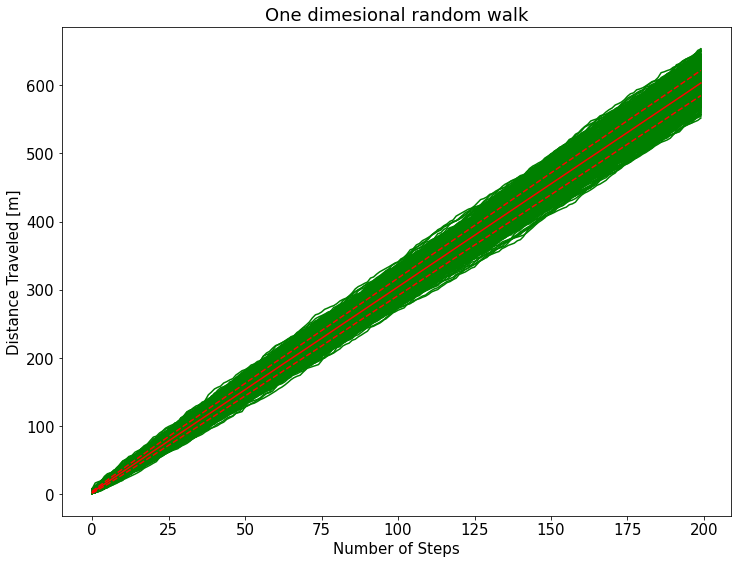

In [2]:
plt.rcParams.update({'font.size': 15})       # Change the font size for the figure
mean_X = np.mean(X,axis=1)                   # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1)                     # Calculate the standard deviation of all walkers through time

plt.figure(figsize=(12,9))                   # Create a figure and make it 12" wide x 19" tall

plt.plot(np.arange(Nt),X,'g-')               # Plot x vs i (created using np.arange(Nt)) as a blue line
plt.plot(np.arange(Nt),mean_X,'r-')          # Plot the mean position as a red line
plt.plot(np.arange(Nt),mean_X + std_X, 'r--')# Plot the range covered by one standard deviation above the mean
plt.plot(np.arange(Nt),mean_X - std_X, 'r--')# Plot the range covered by one standard deviation below the mean
plt.xlabel('Number of Steps')                # Label of the x-axis
plt.ylabel('Distance Traveled [m]')          # Label of the y-axis
plt.title('One dimesional random walk')      # Title
plt.show()

From above plot, the random walk start at the same point but move away from where they started. As the step size increases, the distance traveled also increases. The red solid line represents the average distance traveled by all the random walks. The dash lines represent the range covered by one standard deviation above and one standard deviation below the mean.

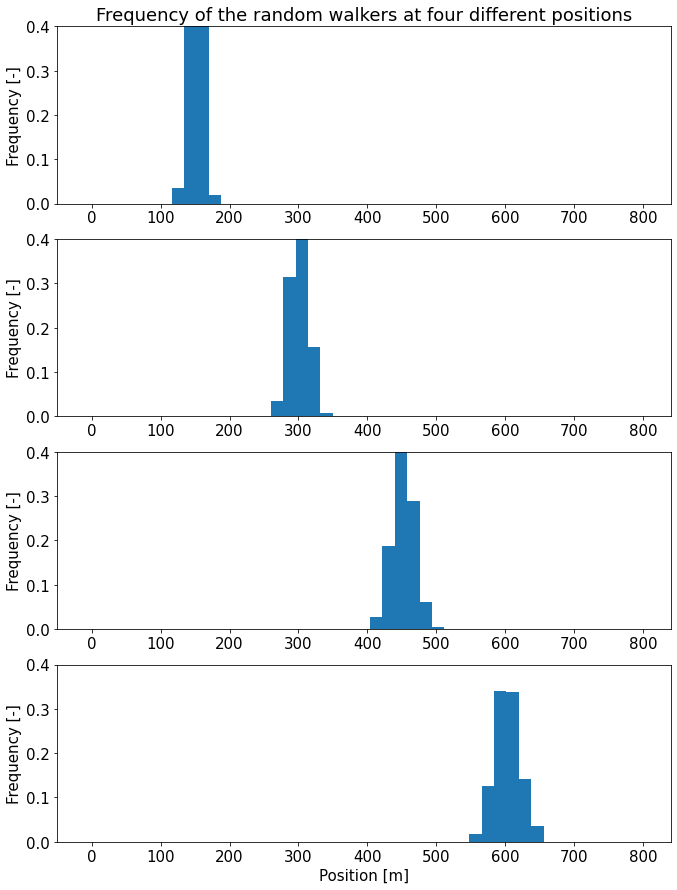

In [3]:
plt.rcParams.update({'font.size': 15})            # Change the font size for the figure

x_50, be_50 = np.histogram(X[49,:], bins=45, range=(-10.0,800))  # histogram of the random walkers at the 49 time step
x_100, be_100 = np.histogram(X[99,:], bins=45, range=(-10.0,800))# histogram of the random walkers at the 99 time step 
x_150, be_150 = np.histogram(X[149,:], bins=45, range=(-10.0,800))# histogram of the random walkers at the 149 time step
x_200, be_200 = np.histogram(X[-1,:], bins=45, range=(-10.0,800)) # histogram of the random walkers at the 1000 time step

plt.figure(figsize=(11,15))       # Create a figure and make it 11" wide x 15" tall
plt.subplot(4,1,1)                # First subplot
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) # plot of the 
plt.ylim((0.0,0.4))               # Set the limit of y-axis
plt.ylabel('Frequency [-]')       # Label of y-axis
plt.title('Frequency of the random walkers at four different positions')
plt.subplot(4,1,2)                # Second subplot
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')       # Label of y-axis

plt.subplot(4,1,3)                # Third subplot
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.4))               # Set the limit of y-axis
plt.ylabel('Frequency [-]')       # Label of y-axis

plt.subplot(4,1,4)                # Fourth subplot
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.4))               # Set the limit of y-axis
plt.xlabel('Position [m]')        # Label of x-axis
plt.ylabel('Frequency [-]')       # Label of y-axis
plt.show()

The above figure depicts the histogram of the position of the random walkers at four different time steps 49, 99, 149 and 1000. From the four plots, we noticed that the frequency increases with the time steps.

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [4]:
Nt = 300     # This is the number of steps (or time steps) in our Random Walk
N  = 3       # Initialize the number of walkers.

mu_x = 0.5   # The average step size in our random walk in x-direction
s_x = 1.5    # The standard deviation of the step size in our random walk in x-direction
mu_y = 5.0   # The average step size in our random walk in y-direction
s_y = 2.5    # The standard deviation of the step size in our random walk in y-direction

# Create an array of zeros for all walkers at each time step that has Nt rows and N columns in x and y directions.
# So each row corresponds to a specific time step and each column corresponds to a specific walker.
X = np.zeros((Nt,N))
Y = np.zeros((Nt,N))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. 
    
    for j in np.arange(N):

        # Calculate the random step size for the j^th walker at the i^th time step in both directions (x and y)
        x_i = s_x*np.random.randn() + mu_x
        y_i = s_y*np.random.randn() + mu_y
    
        # Check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = x_i 
            Y[i,j] = y_i
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            Y[i,j] = Y[i-1,j] + y_i 
            

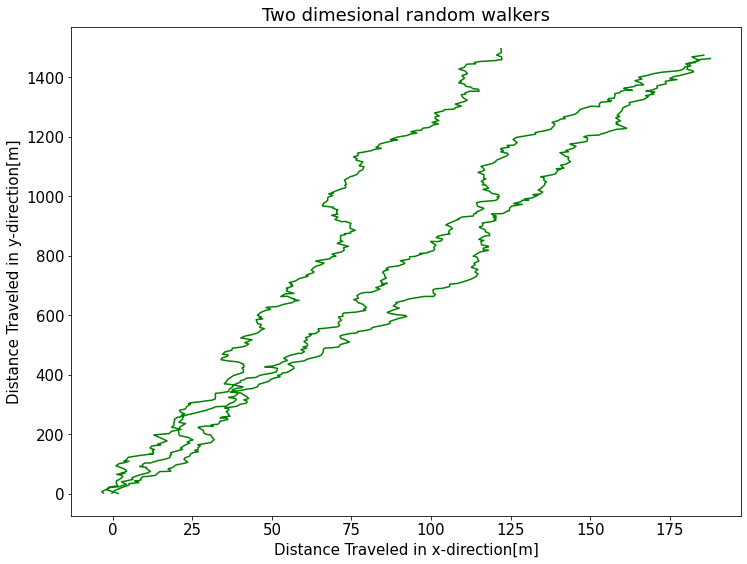

In [5]:
plt.rcParams.update({'font.size': 15})            # Change the font size for the figure

plt.figure(figsize=(12,9))                        # Create a new figure and make it 12" wide by 9" tall

plt.plot(X,Y,'g-')                                # Plot the location of all walkers in x-direction versus all walkers y-direction
plt.xlabel('Distance Traveled in x-direction[m]') # Label of the x-axis
plt.ylabel('Distance Traveled in y-direction[m]') # Label of the y-axis
plt.title('Two dimesional random walkers')        # title

plt.show()

The position of our three random walkers at each step size were presented in above figure. The random walkers start alomst in one place randomly walking away and each random walker present a chaotic behavior making its next position unpredictable.